In [1]:
import pandas as pd
from sklearn import feature_extraction
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../data/row/train.csv')
df_test = pd.read_csv('../data/row/test.csv')

In [3]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
count_vactorizer = feature_extraction.text.CountVectorizer()

In [6]:
train_vectors = count_vactorizer.fit_transform(df_train.text)

In [7]:
train_vectors.todense().shape

(7613, 21637)

In [8]:
test_vectors = count_vactorizer.transform(df_test.text)

test_vectors.todense().shape

(3263, 21637)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train_vectors, df_train.target, test_size=0.2, random_state=45)

In [10]:
model_logistic_regression = LogisticRegression(penalty='l2', 
                           max_iter=1000, 
                           solver='saga',
                           random_state=45)

model_logistic_regression.fit(X_train, y_train)

y_train_pred = model_logistic_regression.predict(X_train)
y_test_pred = model_logistic_regression.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

f"{train_acc = :.2f} | {test_acc = :.2f}"

'train_acc = 0.97 | test_acc = 0.80'

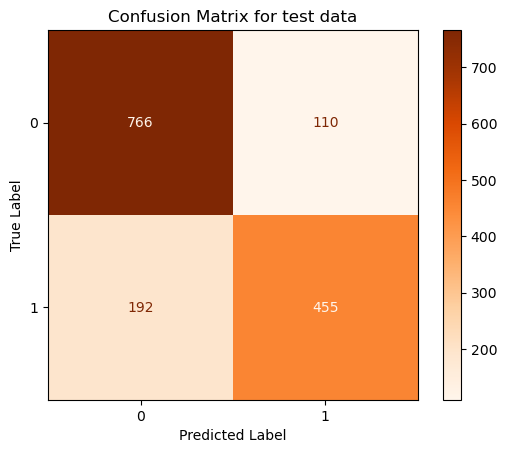

In [11]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

display.plot(cmap=plt.cm.Oranges)

plt.title('Confusion Matrix for test data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [12]:
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=45)

model_random_forest.fit(X_train, y_train)

y_train_pred = model_random_forest.predict(X_train)
y_test_pred = model_random_forest.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

f"{train_acc = :.2f} | {test_acc = :.2f}"

'train_acc = 1.00 | test_acc = 0.79'

In [13]:
model_gradient_boosting_clf = GradientBoostingClassifier(n_estimators=1000,
                                                         random_state=45)

model_gradient_boosting_clf.fit(X_train, y_train)

y_train_pred = model_gradient_boosting_clf.predict(X_train)
y_test_pred = model_gradient_boosting_clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

f"{train_acc = :.2f} | {test_acc = :.2f}"

'train_acc = 0.90 | test_acc = 0.80'

In [14]:
model_linear_svc = LinearSVC(random_state=45)

model_linear_svc.fit(X_train, y_train)

y_train_pred = model_linear_svc.predict(X_train)
y_test_pred = model_linear_svc.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

f"{train_acc = :.2f} | {test_acc = :.2f}"

'train_acc = 1.00 | test_acc = 0.78'

In [15]:
y_test_labels = model_logistic_regression.predict(test_vectors)

y_test_labels

array([1, 0, 1, ..., 1, 1, 0])

In [16]:
df_test['target'] = y_test_labels

df_test

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,1
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1


In [17]:
df_test[['text', 'target']][df_test['target'] == 0].head(15)

,text,target
1,"Heard about #earthquake is different cities, s...",0
3,Apocalypse lighting. #Spokane #wildfires,0
6,They'd probably still show more life than Arse...,0
7,Hey! How are you?,0
8,What a nice hat?,0
9,Fuck off!,0
10,No I don't like cold!,0
11,NOOOOOOOOO! Don't do that!,0
12,No don't tell me that!,0
13,What if?!,0


In [18]:
df_test[['text', 'target']].sample(10, random_state=45)

,text,target
1772,#ine #instyle Olap #world pres: http://t.co/PJ...,1
12,No don't tell me that!,0
2569,*aggressively screams* https://t.co/8bHaejsUUt,0
1731,Boston yesterday after an intense hailstorm. P...,1
230,Car Receiving tube Installation for Avalanche ...,0
108,***Latest Updates on the Salt River Wild Horse...,0
258,FedEx no longer to transport bioterror germs i...,1
666,If a å£1 rise in wages is going to have such a...,0
1551,@martinsymiguel @FilipeCoelho92 FATALITY,0
1628,*NEW* Snap On Tools Black baseball Hat/Cap Sil...,0


In [19]:
df_test[['id', 'target']].to_csv('../data/processed/submission_1.csv', index=False)